# Regression Model

**Purpose of script:**

- Test regression model suitability in data fusion context
- Test different regressors

## Data Prep

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [20]:
df_path = r"../Data/combined/"


In [21]:
df = pd.read_parquet(df_path + 'melt_2019-07-01_extended.parquet.gzip')
df = df.fillna(-1)
X = df[['x', 'y', 'mw_value', 'col', 'row', 'v1', 'v2', 'v3', 'v4', 'v6', 'v7', 'v8', 'v9', 'mean']] # v5 is duplicated
y = df[['opt_value']]

In [23]:
df2 = pd.read_parquet(df_path + 'melt_2019-07-02.parquet.gzip')
df2 = df.fillna(-1)
X2 = df[['x', 'y', 'mw_value', 'col', 'row', 'v1', 'v2', 'v3', 'v4', 'v6', 'v7', 'v8', 'v9', 'mean']] # v5 is duplicated
y2 = df[['opt_value']]

In [24]:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training, 20% test and 10% validation
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

#temp
X_train = X
y_train = y

X_test = X2
y_test = y2


#### Decision tree regressor

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [26]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
#cross_val_score(regressor, X_train, y_train, cv=5)
# random state

DecisionTreeRegressor(random_state=0)

In [27]:
y_predicted = regressor.predict(X_test)


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
rmse

3.535110514047158e-11

In [ ]:
# join prediction and coordinates (row, col)

In [30]:
X2['prediction'] = y_predicted

/tmp/ipykernel_591/1605312614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['prediction'] = y_predicted


In [ ]:
# in discussion think about how to make outlines better ? or will it not be blocky?  - it probably will 

In [15]:
# original matrix shape:
# data_mw #(2687, 1487) -> y: 2663x: 1462
nan_matrix = np.full((2663, 1462), np.nan)

In [18]:
nan_matrix

array([[nan,  2., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [44]:
# for each prediction line
for row in X2.iterrows():
    row_index = int(row[1]['row'])
    col_index = int(row[1]['col'])
    pred_val = row[1]['prediction']
    nan_matrix[row_index][col_index] = pred_val

In [45]:
nan_matrix

array([[nan,  2., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [56]:
import xarray


In [ ]:
# in next cell x and y are wrong - they should be real coordinates, values from old xarray

In [57]:
#nan_matrix2 = np.asmatrix(nan_matrix, dtype=None)
data_xr = xarray.DataArray(nan_matrix, 
coords={'y': list(range(0, nan_matrix.shape[0])),'x': list(range(0, nan_matrix.shape[1]))}, 
dims=["y", "x"])

In [58]:
data_xr

<xarray.DataArray (y: 2663, x: 1462)>
array([[nan,  2., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 2656 2657 2658 2659 2660 2661 2662
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 1455 1456 1457 1458 1459 1460 1461

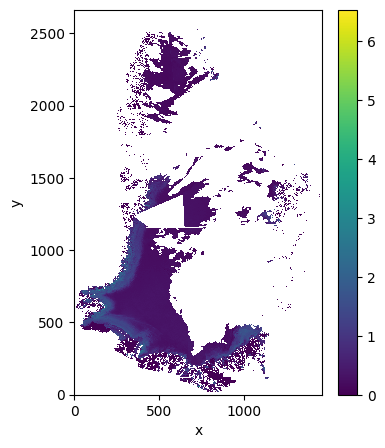

In [59]:
#plot matrix
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
data_xr.plot(ax=axes)
plt.draw()
# plt.plot(nan_matrix)
# plt.show()

In [ ]:
# its upside down - need to turn or fix process that populates matrix or turn into xarray

In [61]:
import rioxarray

In [63]:
# convert to tif?
data_xr.rio.to_raster('test_prediction_out.tif')

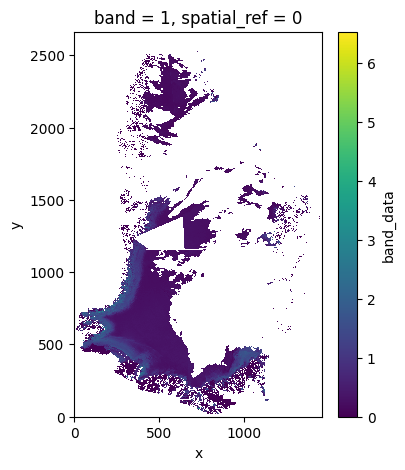

In [65]:
# test opening and plotting
test_data_tif = xarray.open_dataarray('test_prediction_out.tif')
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test_data_tif.plot(ax=axes)
plt.draw()


### Linear regression

In [21]:
from sklearn.linear_model import LinearRegression


In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
target_predicted = linear_model.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, target_predicted))
rmse

0.3818799687207228

### Some other model